# Federal University of Ceará
# Teleinformatics Departament
# Graduate Program in Teleinformatics Engeneering
## TIP8419 - Tensor Algebra
## Homework 1 - Kronecker Product
### Simulation results

- Ezequias Márcio - 497779

To run this notebook properly, it is necessary Python3 installed alongside alongside with the packages listed below:

- `numpy 1.17.2`
- `tensorly 0.4.5`
- `matplotlib 3.1.1`
- `seaborn 0.9.0`
- `tdqm 4.36.1`

Make sure that the file `tensoralg.py` is in the same directory as this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensoralg # Module created for this hw
from tensorly.tenalg import khatri_rao
from time import perf_counter_ns
from tqdm import tqdm, tnrange
sns.set_style("whitegrid")
np.set_printoptions(3, linewidth=175)

In [3]:
# Number of rows/columns:
n = np.array([2,4,8,16,32])#,64])
realiz = 100
# Variables to store the time values:
inv_kron = np.zeros((realiz, n.size))
kron_inv = np.zeros((realiz, n.size))
n_inv_kron = np.zeros((realiz, n.size))
n_kron_inv = np.zeros((realiz, n.size))

### Testing functions

In [4]:
def n_kron(mt_list):
    # Calculates the product kron(kron(A, A), A)
    n_kron_prod = mt_list[0]
    for matrix in mt_list[1:]:
        n_kron_prod = tensoralg.kron(n_kron_prod, matrix)
    
    return n_kron_prod

In [5]:
# Matrices for testing:
M, N = 4, 4
A = np.random.rand(M, 2*N).view(np.complex_)

# Nested Kronecker product:
print(f'''Matrix A:
{A}

A \otimes A \otimes A:
{n_kron([A]*3)}

{np.allclose(n_kron([A]*3), tensoralg.kron(tensoralg.kron(A, A), A))}
''')

Matrix A:
[[0.03 +0.392j 0.403+0.693j 0.742+0.094j 0.493+0.921j]
 [0.263+0.973j 0.926+0.13j  0.128+0.804j 0.161+0.865j]
 [0.273+0.484j 0.222+0.795j 0.201+0.59j  0.943+0.363j]
 [0.358+0.668j 0.965+0.071j 0.661+0.771j 0.158+0.777j]]

A \otimes A \otimes A:
[[-0.014-0.059j -0.078-0.096j -0.116+0.003j ... -0.873-0.052j -0.534+0.618j -1.135-0.108j]
 [-0.063-0.143j -0.145+0.002j -0.039-0.12j  ... -0.678+0.763j -0.808-0.37j  -0.884-0.376j]
 [-0.053-0.068j -0.053-0.116j -0.045-0.086j ... -0.857-0.279j -0.658-0.174j -0.9  +0.637j]
 ...
 [-0.549-0.183j -0.356+0.401j -0.425-0.194j ... -0.567+0.151j -0.27 -0.433j -0.305-0.461j]
 [-0.318-0.024j -0.451-0.146j -0.346-0.091j ... -0.323-0.405j -0.261-0.292j -0.634+0.021j]
 [-0.433-0.041j -0.341+0.439j -0.579+0.071j ... -0.575+0.195j -0.571-0.284j -0.281-0.41j ]]

True



### Performance simulations - Problem 01 (a)

Dealing with $N\in \{2,4,8,16,32\}$ avoid memory issues (only 6Gb avaliable in my machine).

- Matrix inversion complexity: $\mathcal{O}(n^{3})$
- Number of multiplications in $\big(A\otimes B \big)$: $n^4$

In [13]:
# Mean over 100 realizations:
for r in tnrange(realiz):
    for idx, val in enumerate(n):
        # Generating N x N matrices:
        A = np.random.rand(val, 2*val).view(np.complex_)
        B = np.random.rand(val, 2*val).view(np.complex_)
    
        # Kronecker:
        ti = perf_counter_ns()
        np.linalg.inv(tensoralg.kron(A, B)) # measuring the execution time
        tf = perf_counter_ns()
        inv_kron[r, idx] = tf - ti 
    
        ti = perf_counter_ns()
        tensoralg.kron(np.linalg.inv(A), np.linalg.inv(B)) # measuring the execution time
        tf = perf_counter_ns()
        kron_inv[r, idx] = tf - ti

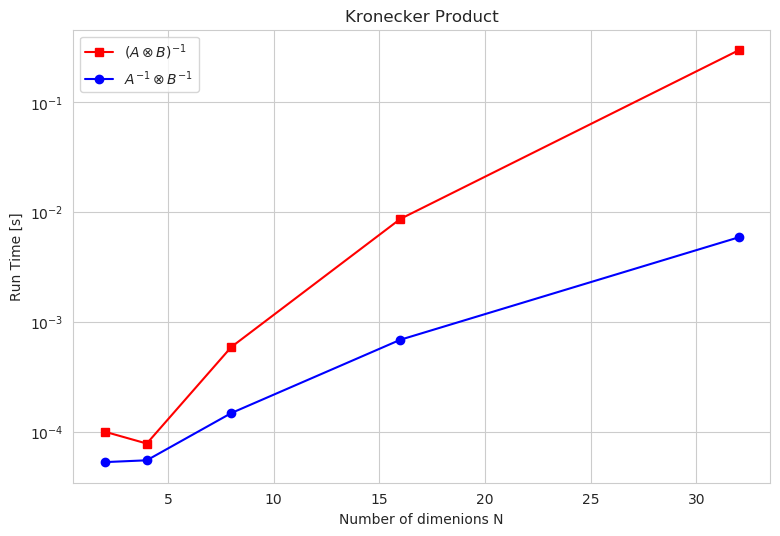

In [15]:
# Plots:
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)
ax.semilogy(n, inv_kron.mean(axis=0)*1e-9, '-rs', label='$(A\otimes B)^{-1}$')
ax.semilogy(n, kron_inv.mean(axis=0)*1e-9, '-bo', label='$A^{-1}\otimes B^{-1}$')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Run Time [s]')
ax.set_title('Kronecker Product')
ax.legend()
plt.savefig('reports/figs/invkron.pdf')
plt.show()

### Performance simulations - Problem 01 (b)

Dealing with $2\times 2$ matrices to avoid memory issues (only 6Gb avaliable in my machine).

- Matrix inversion complexity: $\mathcal{O}(n^{3})$


In [10]:
# Mean over 100 realizations:
nn = [2, 4, 6, 8, 10]
for r in tnrange(realiz):
    for idx, val in enumerate(nn):
        # Generating N x N matrix:
        A = np.random.rand(2, 2*2).view(np.complex_)
        # Kronecker:
        ti = perf_counter_ns()
        np.linalg.inv(n_kron([A]*val)) # measuring the execution time
        tf = perf_counter_ns()
        n_inv_kron[r, idx] = tf - ti 
    
        ti = perf_counter_ns()
        n_kron([np.linalg.inv(A)]*val) # measuring the execution time
        tf = perf_counter_ns()
        n_kron_inv[r, idx] = tf - ti

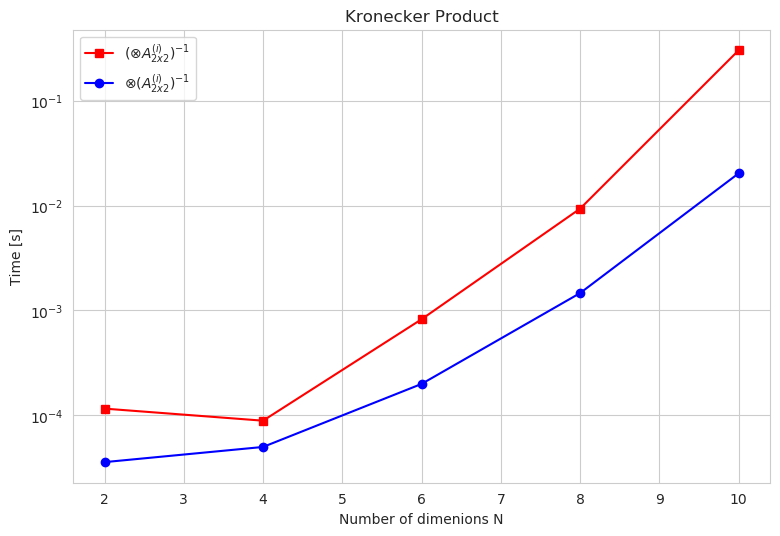

In [16]:
# Plots:
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)
ax.semilogy(nn, n_inv_kron.mean(axis=0)*1e-9, '-rs', label='$(\otimes A^{(i)}_{2x2} )^{-1}$')
ax.semilogy(nn, n_kron_inv.mean(axis=0)*1e-9, '-bo', label='$\otimes (A^{(i)}_{2x2})^{-1}$')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Time [s]')
ax.set_title('Kronecker Product')
ax.legend()
plt.savefig('reports/figs/ninvkron.pdf')
plt.show()